# Physics 7305
## Homework 12
*MaryLena Bleile*

**Problem**
Suppose you are in an infinitely large, infinitely old universe in which the average
density of stars is n = 109 Mpc−3 and the average stellar radius is equal to the Sun’s
radius R⊙ = 7 × 108 m. How far, on average, could you see in any direction before
your line of sight struck a star? (Assume standard Euclidean geometry holds true in
this universe.)
1. Find the solution theoretically on paper, listing all the steps and assumptions.
2. Verify your answer with Monte Carlo computer code. Use any language that you like. Make sure that you shoot enough lines in enough universes. Turn in the code electronically. Also turn in some runs, showing the code working and producing output.

For this problem, we can think of the line of sight as a cylinder with radius $R = 7 \times 10^8 (m)$ (representing all the space in which a star center would result in an intersection). Cutting the cylinder off at the first point of intersection with a star locus and taking the length would give us a single observed value. To get the average, we can make the cylinder big enough to encompass many points, and then simply divide its length by the expected number of points lying within (which can be determined by the density of star loci). The volume of a cylinder is given by $\pi R^2 h$, where $R$  is the radius and $h$ is the length of the cylinder. Let the expected value of the length before sight intersects a star be denoted by $l$. So, with $n$ as the density of stars, we have $$l = \frac{h}{\pi R^2 h}\times \frac{1}n = \frac{1}{\pi R^2 n}$$.

In order for the above formula to be useful, we need to do some unit conversions. Namely, our value for $n$ is in terms of cubic Megaparsecs, whereas we need our result in meters. The conversion formula of interest here is $1 Mpc = 3.1 \times 10^{22} m $. Hence, 
$$ \frac{1}l = \frac{10^9}{(3.1 \times 10^{22})^3} \pi (7 \times 10^8)^2 \frac{m^2}{m^3}  = 5.167 \times 10^{-41} m^{-1}$$ (note, as a sanity check, this gives us $l$ in terms of meters, like we wanted). Therefore we can expect to see, on average, $l =5.167 \times 10^{41}$ meters before our line of sight intersects with a star. Further, since the stars are distributed randomly, we can expect that the individual lengths $l$ will be exponentially distributed with rate parameter $\lambda  = 5.167 \times 10^{-41} $ (were we to be able to see through the stars, our star sights in a given direction would form a Poisson process). 

In order for the simulation to work, we need to increase the density of star loci dramatically. Here, we generate $k= 400 000$ stars in a galaxy of size $200 (m^3)$, giving us a density of $n'  = k/(200^3)= .05 = .05 \times 10^9  \times (3.1 \times 10^{22})^{-3} n $ stars per cubic meter. Setting a new radius $R' =1 = 7 \times 10^{-8} R $ gives us an expected distance of $l' = \frac{1}{\pi (0.05)} = 6.36 = \frac{1}{\pi (7 \times 10^{-8} R)^2(.05 \times 10^9  \times (3.1 \times 10^{22})^{-3} n)}$. We can easily use the same multipliers to get back to the original scale; that is, $l = \frac{.05 \times \pi}{5.167 \times 10^{-41}} l'$. In a little more detail,
recall that the problem can be framed as a Poisson process with stars occuring in space at rate $\lambda = 5.167 \times 10^{-41}$. So the desired quantity (distance to first intersection) will be an exponentially distributed random variable with rate parameter $\lambda$. Suppose that, while this random variable is not directly observable, there exists a second exponentially distributed random variable $x'$ with rate parameter $\lambda'$. But suppose we also know that $\lambda' = c \lambda, c \epsilon \mathbb{R}$. Then, we can estimate $E[x'] = \frac{1}{\lambda'} = \frac{1}{c \lambda}$ via Monte Carlo simulation. Let $\hat{\lambda'}$ be the Monte Carlo estimator for $E[x']$. Shuffling things around a bit we get $ \lambda = \frac{1}{c E[x']} $ which implies that $\hat{\lambda} := \frac{1}{c \hat{\lambda'}}$ is an unbiased estimator of $\lambda$, as required.

In [38]:
galaxies = 0
runningsum = 0
outs = c()
k=400000

lwr= -100
upr = 100

M=1000
b=100

In [39]:
n= k/(2*upr)^3
cat("new value for n: ", n)
cat("\nnew value for l':", 1/(pi*(n)), "\n")


new value for n:  0.05
new value for l': 6.366198 


In [40]:
t=1

In [41]:
while(galaxies<=M){
  galaxies= galaxies+1
  xstars = runif(k, lwr,upr)
  ystars= runif(k, lwr,upr)
  zstars=runif(k, lwr, upr)
  
  dists= sqrt(xstars^2 + ystars^2+zstars^2)
  thetasight = acos(runif(b,0,1))
  phisight = runif(b, 0, 2*pi)
  
  for(t in 1:length(thetasight)){
    theta= thetasight[t]
    phi= phisight[t]
    xsight = cos(theta)*sin(phi)
    ysight = sin(theta)*sin(phi)
    zsight= cos(phi)
    denom = xsight^2+ ysight^2+ zsight^2
    num = xsight*xstars + ysight*ystars+zsight*zstars
    allpos = (xsight*xstars>0) & (ysight*ystars>0) & (zsight*zstars>0)
    numpos= (num >0)
    
    scalars= abs(num/denom)
    orthoprojx = xsight*scalars
    orthoprojy = ysight*scalars
    orthoprojz = zsight*scalars
    orthoproj = sqrt((orthoprojx - xstars)^2+ (orthoprojy-ystars)^2 +(orthoprojz-zstars)^2)
    #print(length(xstars[scalars>0])==length(xsight[scalars>0]))
    if(is.na(min(orthoproj))){
      cat("Orthoproj min is NA in galaxy ",galaxies)
    }
    if(min(orthoproj)<=1){
      d=min(dists[orthoproj<=1])
    }else{
      d=Inf
      cat("\n Error: infinite distance:", galaxies)
    }
    if(d!=Inf){
    runningsum=runningsum+d}
    outs=c(outs, d)
    
    
  }
  
  
}


 result:  6.336399

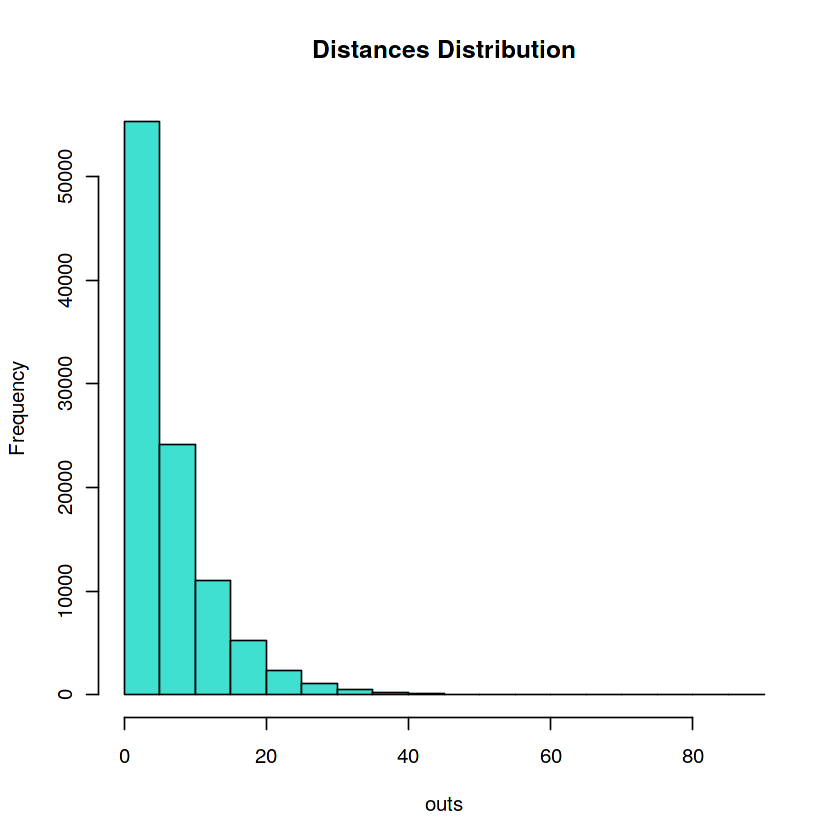

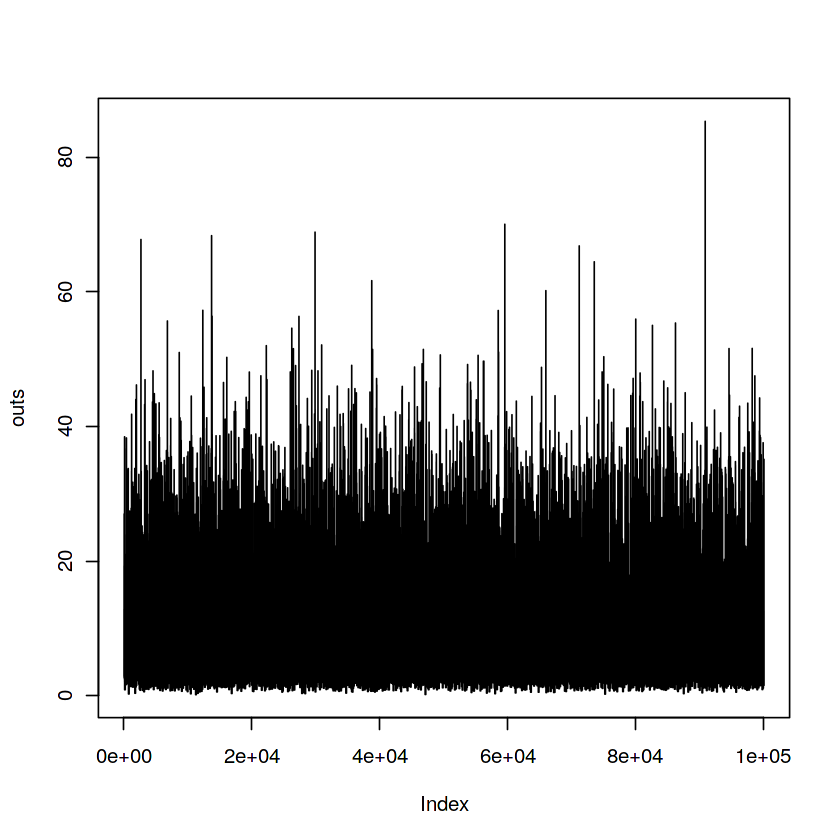

In [44]:
cat("\n result: ", runningsum/(M*b))
hist(outs, col="turquoise", main="Distances Distribution")
plot(outs, type="l")

In [43]:
lprime= runningsum/(M*b)
l = lprime * 0.05 * pi * 5.167 * 10^{41}
cat("result on the original scale: ", l)

result on the original scale:  5.142815e+41

Within a small degree of error, our results agree with theory.